In [1]:
from ANN import *

from process_IME_dfs import *

C:\Users\mlgpkhad\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Paths to the datasets
train_path_1= r'C:/Users/mlgpkhad/Desktop/Data/newData/train/trainset_knob7c.csv'
train_path_2= r'C:/Users/mlgpkhad/Desktop/Data/newData/train/trainset_knob7c_annData508487.csv'

test1_path_1= r'C:/Users/mlgpkhad/Desktop/Data/newData/test1/testset_knob7bf.csv'
test1_path_2= r'C:/Users/mlgpkhad/Desktop/Data/newData/test1/testset_knob7bf_annData568470.csv'

test2_path_1= r'C:/Users/mlgpkhad/Desktop/Data/newData/test2/testset_knob7af.csv'
test2_path_2= r'C:/Users/mlgpkhad/Desktop/Data/newData/test2/testset_knob7af_annData500187.csv'

In [3]:
### Dataset switcher

#1 Training testing pattern - 7c train, 7bf and 7af test
df= process_mps_st_dfs(p1= train_path_1, p2= train_path_2)
df1_final_testing= process_mps_st_dfs(p1= test1_path_1, p2= test1_path_2)
df2_final_testing= process_mps_st_dfs(p1= test2_path_1, p2= test2_path_2)

#2 Training testing pattern - 7bf train, 7c and 7af test
# df= process_mps_st_dfs(p1= test1_path_1, p2= test1_path_2)
# df1_final_testing= process_mps_st_dfs(p1= train_path_1, p2= train_path_2)
# df2_final_testing= process_mps_st_dfs(p1= test2_path_1, p2= test2_path_2)

#3 Training testing pattern - 7af train, 7c and 7bf test
# df= process_mps_st_dfs(p1= test2_path_1, p2= test2_path_2)
# df1_final_testing= process_mps_st_dfs(p1= test1_path_1, p2= test1_path_2)
# df2_final_testing= process_mps_st_dfs(p1= train_path_1, p2= train_path_2)

# df['maxPrin(%)'], df['sThin(%)']= np.log(df['maxPrin(%)']), np.log(df['sThin(%)'])
# df1_final_testing['maxPrin(%)'], df1_final_testing['sThin(%)']= np.log(df1_final_testing['maxPrin(%)']), np.log(df1_final_testing['sThin(%)'])
# df2_final_testing['maxPrin(%)'], df2_final_testing['sThin(%)']= np.log(df2_final_testing['maxPrin(%)']), np.log(df2_final_testing['sThin(%)'])

In [4]:
# Imitating kernel methods by adding a Z column for elCents and nDCos_

def add_elCentsZ(df):
    df['elCentsZ']= np.square(df.elCents1_diff.copy())+np.square(df.elCents2_diff.copy())+np.square(df.elCents3_diff.copy())
    return df.copy()

def add_nDCosZ(df):
    df['nDCosZ']= np.square(df.nDCos_x.copy())+np.square(df.nDCos_y.copy())+np.square(df.nDCos_z.copy())
    return df.copy()

# Add elCentsZ
# df= add_elCentsZ(df.copy())
# df1_final_testing= add_elCentsZ(df1_final_testing.copy())
# df2_final_testing= add_elCentsZ(df2_final_testing.copy())

# Add nDCosZ
# df= add_nDCosZ(df.copy())
# df1_final_testing= add_nDCosZ(df1_final_testing.copy())
# df2_final_testing= add_nDCosZ(df2_final_testing.copy())

In [5]:
df.columns

Index(['elCents1_diff', 'elCents2_diff', 'elCents3_diff', 'nDCos_x', 'nDCos_y',
       'nDCos_z', 'X1f', 'Y1f', 'Z1f', 'X2f', 'Y2f', 'Z2f', 'X3f', 'Y3f',
       'Z3f', 'X4f', 'Y4f', 'Z4f', 'temp', 'arGrowth', 'maxPrin(%)',
       'sThin(%)'],
      dtype='object')

In [6]:
### Direction angles instead direction cosines

# def dir_angles_instead_dir_cos(df= None):
#     return np.arccos(df['nDCos_x'].values.ravel()), np.arccos(df['nDCos_y'].values.ravel()), np.arccos(df['nDCos_z'].values.ravel())

# df['nDA_x'], df['nDA_y'], df['nDA_z']= dir_angles_instead_dir_cos(df= df)
# df1_final_testing['nDA_x'], df1_final_testing['nDA_y'], df1_final_testing['nDA_z']= dir_angles_instead_dir_cos(df= df1_final_testing)
# df2_final_testing['nDA_x'], df2_final_testing['nDA_y'], df2_final_testing['nDA_z']= dir_angles_instead_dir_cos(df= df2_final_testing)

In [7]:
# Dropping NA rows
df.dropna(inplace= True)
df1_final_testing.dropna(inplace= True)
df2_final_testing.dropna(inplace= True)

In [8]:
### Distance instead coordinates for Xs, Ys, and Zs

# def dist_instead_coord(df1= None, df2= None, df3= None):
    
#     def dist(df= None):
#         dist1= np.sqrt(np.square(df['X1f']-df['X3f'])+np.square(df['Y1f']-df['Y3f'])+np.square(df['Z1f']-df['Z3f']))
#         dist2= np.sqrt(np.square(df['X2f']-df['X4f'])+np.square(df['Y2f']-df['Y4f'])+np.square(df['Z2f']-df['Z4f']))
#         return dist1, dist2
    
#     d11, d12= dist(df1)
#     d21, d22= dist(df2)
#     d31, d32= dist(df3)
    
#     return d11, d12, d21, d22, d31, d32

# df['XYZ13'], df['XYZ24'], df1_final_testing['XYZ13'], df1_final_testing['XYZ24'], df2_final_testing['XYZ13'], df2_final_testing['XYZ24']= dist_instead_coord(df1= df.copy(), df2= df1_final_testing.copy(), df3= df1_final_testing.copy())
# df.drop(['X1f', 'X2f', 'X3f', 'X4f', 'Y1f', 'Y2f', 'Y3f', 'Y4f', 'Z1f', 'Z2f', 'Z3f', 'Z4f', 'nDCos_x', 'nDCos_y', 'nDCos_z'], inplace= True, axis=1)
# df1_final_testing.drop(['X1f', 'X2f', 'X3f', 'X4f', 'Y1f', 'Y2f', 'Y3f', 'Y4f', 'Z1f', 'Z2f', 'Z3f', 'Z4f', 'nDCos_x', 'nDCos_y', 'nDCos_z'], inplace= True, axis=1)
# df2_final_testing.drop(['X1f', 'X2f', 'X3f', 'X4f', 'Y1f', 'Y2f', 'Y3f', 'Y4f', 'Z1f', 'Z2f', 'Z3f', 'Z4f', 'nDCos_x', 'nDCos_y', 'nDCos_z'], inplace= True, axis=1)

In [9]:
df.columns

Index(['elCents1_diff', 'elCents2_diff', 'elCents3_diff', 'nDCos_x', 'nDCos_y',
       'nDCos_z', 'X1f', 'Y1f', 'Z1f', 'X2f', 'Y2f', 'Z2f', 'X3f', 'Y3f',
       'Z3f', 'X4f', 'Y4f', 'Z4f', 'temp', 'arGrowth', 'maxPrin(%)',
       'sThin(%)'],
      dtype='object')

In [10]:
def predictions(models, df, tupl, mx= None, mn= None):
    preds= models.model.predict(df.drop(['maxPrin(%)'], axis=1).values)
    
    if models.was_normalized:
        true_dens= denormalize_col(df['maxPrin(%)'].values.ravel(), mx= mx, mn= mn)
        preds_dens= denormalize_col(preds[:,0], mx= mx, mn= mn)
    elif models.was_standardized:
        true_dens= descale_col(df['maxPrin(%)'].values.ravel(), men= mx, std= mn, mul= models.mul)
        preds_dens= descale_col(preds[:,0], men= mx, std= mn, mul= models.mul)
    else:
        true_dens= df['maxPrin(%)'].values.ravel()
        preds_dens= preds[:,0]
        
    pred_df= pd.DataFrame({'actuals': true_dens, 'preds': preds_dens})
    
    pred_df['%diff']= (np.absolute(pred_df.actuals-pred_df.preds)/pred_df.actuals)*100
    print(pred_df.shape)
    val1, val2= tupl[0], tupl[1]
#     print(pred_df[pred_df['%diff'].between(val1, val2)].sort_values(by= ['%diff']).shape)
#     print(pred_df[pred_df['%diff'].between(val1, val2)].sort_values(by= ['%diff']).tail())
    return pred_df[pred_df['%diff'].between(val1, val2)]

In [11]:
def denormalize_col(col= [], mx= None, mn= None): # col is a numpy array
    return ((col*(mx-mn))+mn)

In [12]:
def descale_col(col= [], men= None, std= None, mul= 1): # col is a numpy array
    return (col*mul*std+men)

In [13]:
def _mse(df= None):
    return np.mean(np.square(df['True'].values.ravel()-df['Predicted'].values.ravel()))

def _mae(df= None):
    return np.mean(np.absolute(df['True'].values.ravel()-df['Predicted'].values.ravel()))

def give_mse_mae(df= None):
    return _mse(df), _mae(df)

<h3>maxPrin(%)</h3>

In [14]:
# Creating a copy of df
mpsdf= df.copy()
mpsdf1_final_testing= df1_final_testing.copy()
mpsdf2_final_testing= df2_final_testing.copy()

In [15]:
# Dropping sThin(%)
mpsdf.drop(['sThin(%)'], axis= 1, inplace= True)
mpsdf1_final_testing.drop(['sThin(%)'], axis= 1, inplace= True)
mpsdf2_final_testing.drop(['sThin(%)'], axis= 1, inplace= True)

<h5>Training</h5>

In [16]:
# ANN object creation
mps= ANN(df= mpsdf.copy())
mps.labels= ['maxPrin(%)']

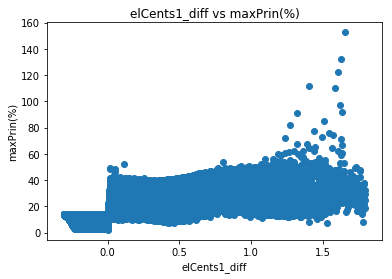

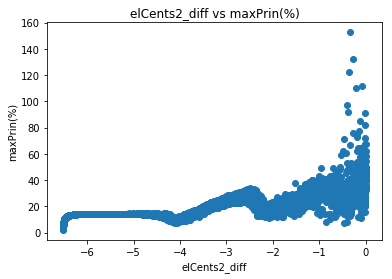

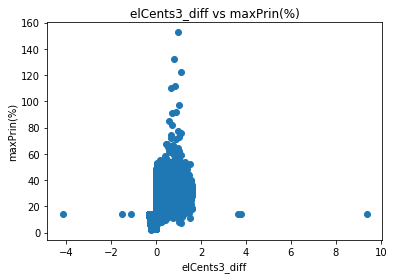

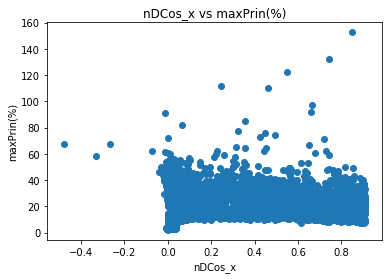

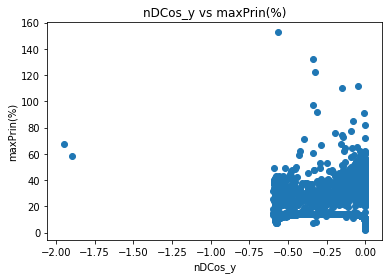

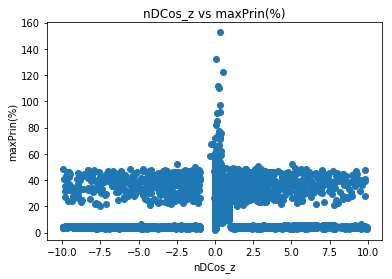

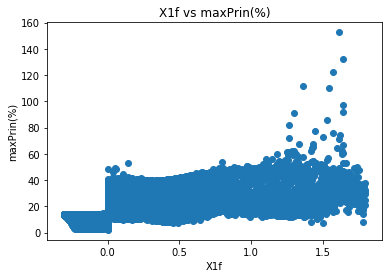

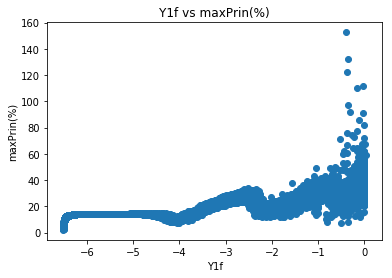

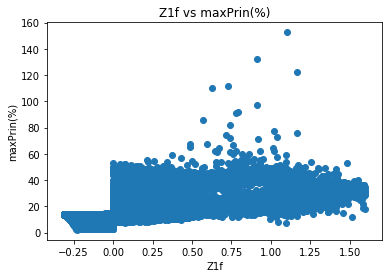

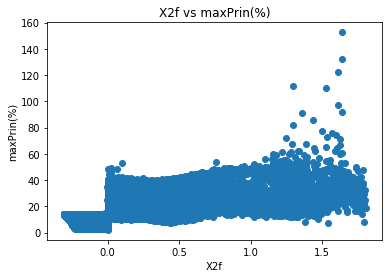

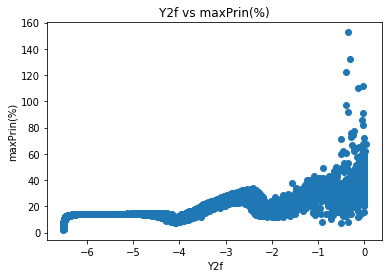

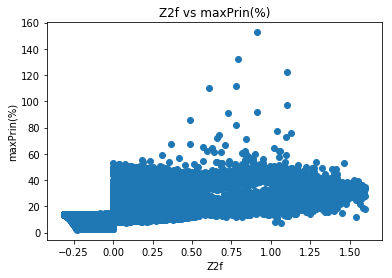

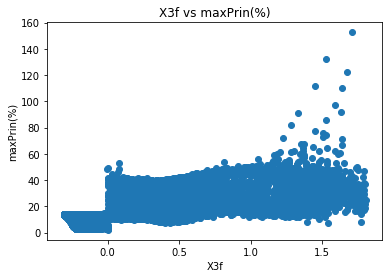

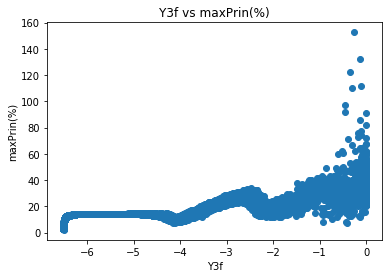

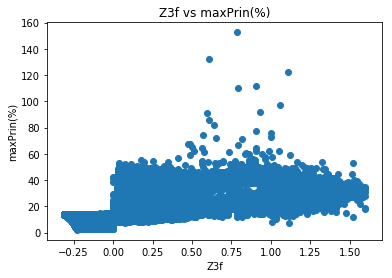

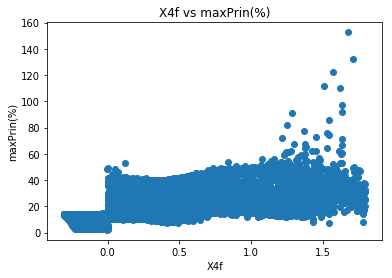

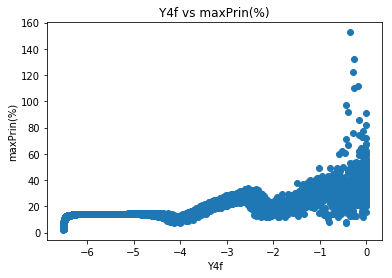

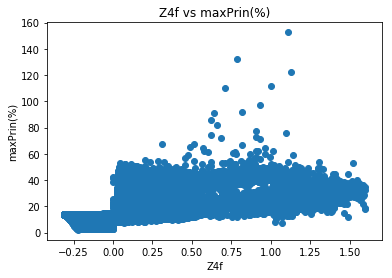

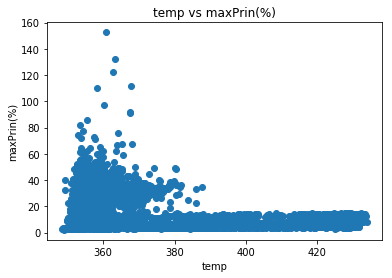

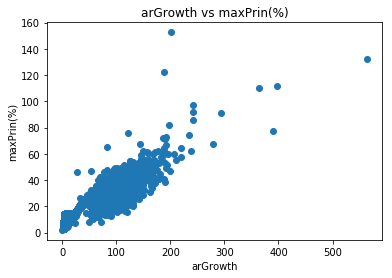

<Figure size 432x288 with 0 Axes>

In [17]:
mps.scatter()

In [18]:
mps.parameters()

Validation size: None
Test size: None
Labels: ['maxPrin(%)']
No. of layers: None
No. of nodes per layer: None
Activation function per layer: None
Learning rate: None
Optimizer: None
Loss: None
Metrics: None
Epochs: None
Batch size: None
Dropout: None
l1 regularization: None
l2 regularization: None



In [19]:
# Setting all parameters
mps.validation_size= 0.15
mps.test_size= 0.15
mps.n_layers= 12
mps.n_nodes_per_layer= [24, 32, 32, 32, 32, 32, 12, 12, 12, 12, 12, 1]
mps.actvn_per_layer= ['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'linear']
mps.lr_rate= 0.001
mps.optimizer= 'Adam'
mps.loss= 'mse'
mps.metrics= ['mae']
mps.epochs= 400
mps.batch_size= 10

mps.dropout= None
mps.l1= None
# mps.l2= [None, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
mps.l2= None

In [20]:
mps.df.describe()

,elCents1_diff,elCents2_diff,elCents3_diff,nDCos_x,nDCos_y,nDCos_z,X1f,Y1f,Z1f,X2f,...,Z2f,X3f,Y3f,Z3f,X4f,Y4f,Z4f,temp,arGrowth,maxPrin(%)
count,18089.000000,18089.000000,18089.000000,18089.000000,1.808900e+04,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000,...,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000,18089.000000
mean,0.136015,-4.665403,0.123979,0.278834,-2.150083e-01,0.157249,0.136251,-4.665051,0.123492,0.136299,...,0.123691,0.135749,-4.665833,0.123330,0.135762,-4.666117,0.123190,393.852761,25.790700,15.738533
std,0.470371,2.200563,0.452551,0.294039,2.378975e-01,1.768654,0.471018,2.201339,0.444548,0.471013,...,0.444816,0.469938,2.200147,0.444288,0.470027,2.199772,0.444056,36.305053,38.229602,10.501878
min,-0.306849,-6.523293,-4.161149,-0.476751,-1.949406e+00,-9.983778,-0.307003,-6.523800,-0.312369,-0.307003,...,-0.312518,-0.306989,-6.523824,-0.312518,-0.306989,-6.523830,-0.312369,348.603500,0.599900,2.099600
25%,-0.184760,-6.488909,-0.185003,0.012759,-4.896641e-01,0.022403,-0.185318,-6.489400,-0.185350,-0.184859,...,-0.185310,-0.184707,-6.488617,-0.184873,-0.185150,-6.488505,-0.185371,352.575500,3.065700,9.734500
50%,-0.053304,-5.719684,-0.054976,0.165216,-9.347397e-02,0.225073,-0.053621,-5.719900,-0.055204,-0.053065,...,-0.055001,-0.053021,-5.711741,-0.055272,-0.053283,-5.716514,-0.055367,424.825500,5.227200,14.133000
75%,0.288223,-3.347687,0.287213,0.507498,-3.239512e-04,0.586887,0.290746,-3.348566,0.285909,0.288417,...,0.287073,0.286695,-3.352810,0.287698,0.288677,-3.353754,0.287639,428.000000,33.390400,17.558100
max,1.799695,0.011515,9.369850,0.907788,1.192093e-07,9.924173,1.797201,0.042711,1.598626,1.804224,...,1.600235,1.804224,0.006004,1.600235,1.798743,0.001076,1.600235,433.787000,563.277300,152.634300


In [21]:
# Normalizing only the predictors
# mps.normalize_df()
# mul= 1
# Normalizing whole dataset
# mps.scale_df(mul= mul)

In [22]:
# mps.df['maxPrin(%)']= mps.df['maxPrin(%)'].copy()/5

In [23]:
# mps.df[df['nDA_z'].isna() == True]

In [24]:
mps.parameters()

Validation size: 0.15
Test size: 0.15
Labels: ['maxPrin(%)']
No. of layers: 12
No. of nodes per layer: [24, 32, 32, 32, 32, 32, 12, 12, 12, 12, 12, 1]
Activation function per layer: ['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'linear']
Learning rate: 0.001
Optimizer: Adam
Loss: mse
Metrics: ['mae']
Epochs: 400
Batch size: 10
Dropout: None
l1 regularization: None
l2 regularization: None



Train on 13068 samples, validate on 2307 samples
Epoch 1/400
13068/13068 [==============================] - 2s 157us/step - loss: 22.1717 - mean_absolute_error: 3.5393 - val_loss: 15.7456 - val_mean_absolute_error: 3.0584
Epoch 2/400
13068/13068 [==============================] - 2s 120us/step - loss: 15.4476 - mean_absolute_error: 2.8409 - val_loss: 15.1244 - val_mean_absolute_error: 3.0479
Epoch 3/400
13068/13068 [==============================] - 2s 120us/step - loss: 12.8248 - mean_absolute_error: 2.4851 - val_loss: 12.7938 - val_mean_absolute_error: 2.7233
Epoch 4/400
13068/13068 [==============================] - 2s 118us/step - loss: 11.2694 - mean_absolute_error: 2.2420 - val_loss: 12.7025 - val_mean_absolute_error: 2.7021
Epoch 5/400
13068/13068 [==============================] - 2s 118us/step - loss: 10.3027 - mean_absolute_error: 2.0889 - val_loss: 11.7480 - val_mean_absolute_error: 2.5722
Epoch 6/400
13068/13068 [==============================] - 2s 117us/step - loss: 9.389

13068/13068 [==============================] - 1s 112us/step - loss: 4.4786 - mean_absolute_error: 1.1278 - val_loss: 3.8782 - val_mean_absolute_error: 0.9797
Epoch 49/400
13068/13068 [==============================] - 1s 114us/step - loss: 4.4098 - mean_absolute_error: 1.1203 - val_loss: 3.6857 - val_mean_absolute_error: 0.9502
Epoch 50/400
13068/13068 [==============================] - 1s 110us/step - loss: 4.3734 - mean_absolute_error: 1.1103 - val_loss: 3.8170 - val_mean_absolute_error: 0.9568
Epoch 51/400
13068/13068 [==============================] - 1s 110us/step - loss: 4.3193 - mean_absolute_error: 1.0957 - val_loss: 3.6777 - val_mean_absolute_error: 0.9095
Epoch 52/400
13068/13068 [==============================] - 1s 111us/step - loss: 4.2938 - mean_absolute_error: 1.0917 - val_loss: 3.8675 - val_mean_absolute_error: 0.9237
Epoch 53/400
13068/13068 [==============================] - 1s 111us/step - loss: 4.2903 - mean_absolute_error: 1.0876 - val_loss: 3.7228 - val_mean_abso

Epoch 96/400
13068/13068 [==============================] - 1s 109us/step - loss: 3.6477 - mean_absolute_error: 0.9587 - val_loss: 3.5707 - val_mean_absolute_error: 0.8478
Epoch 97/400
13068/13068 [==============================] - 1s 111us/step - loss: 3.6608 - mean_absolute_error: 0.9603 - val_loss: 3.8587 - val_mean_absolute_error: 0.9594
Epoch 98/400
13068/13068 [==============================] - 1s 110us/step - loss: 3.7769 - mean_absolute_error: 0.9805 - val_loss: 3.4380 - val_mean_absolute_error: 0.8244
Epoch 99/400
13068/13068 [==============================] - 1s 110us/step - loss: 3.9231 - mean_absolute_error: 1.0006 - val_loss: 3.5504 - val_mean_absolute_error: 0.8318
Epoch 100/400
13068/13068 [==============================] - 1s 110us/step - loss: 3.6161 - mean_absolute_error: 0.9583 - val_loss: 3.4324 - val_mean_absolute_error: 0.8459
Epoch 101/400
13068/13068 [==============================] - 1s 110us/step - loss: 3.6456 - mean_absolute_error: 0.9589 - val_loss: 3.5626 

13068/13068 [==============================] - 2s 118us/step - loss: 3.4008 - mean_absolute_error: 0.8864 - val_loss: 3.8705 - val_mean_absolute_error: 0.8386
Epoch 144/400
13068/13068 [==============================] - 2s 116us/step - loss: 3.4667 - mean_absolute_error: 0.9017 - val_loss: 4.1227 - val_mean_absolute_error: 0.8884
Epoch 145/400
13068/13068 [==============================] - 2s 116us/step - loss: 3.3385 - mean_absolute_error: 0.8736 - val_loss: 3.8560 - val_mean_absolute_error: 0.8509
Epoch 146/400
13068/13068 [==============================] - 2s 121us/step - loss: 3.3868 - mean_absolute_error: 0.8707 - val_loss: 3.6489 - val_mean_absolute_error: 0.8476
Epoch 147/400
13068/13068 [==============================] - 2s 120us/step - loss: 3.4956 - mean_absolute_error: 0.9041 - val_loss: 3.8678 - val_mean_absolute_error: 0.8232
Epoch 148/400
13068/13068 [==============================] - 2s 123us/step - loss: 3.1924 - mean_absolute_error: 0.8531 - val_loss: 3.2870 - val_mean

13068/13068 [==============================] - 2s 119us/step - loss: 3.0221 - mean_absolute_error: 0.8248 - val_loss: 4.3193 - val_mean_absolute_error: 0.8288
Epoch 191/400
13068/13068 [==============================] - 2s 122us/step - loss: 2.8855 - mean_absolute_error: 0.7981 - val_loss: 3.1546 - val_mean_absolute_error: 0.7328
Epoch 192/400
13068/13068 [==============================] - 2s 121us/step - loss: 3.4578 - mean_absolute_error: 0.8416 - val_loss: 3.0081 - val_mean_absolute_error: 0.7161
Epoch 193/400
13068/13068 [==============================] - 2s 116us/step - loss: 3.7849 - mean_absolute_error: 0.8806 - val_loss: 3.7855 - val_mean_absolute_error: 0.8516
Epoch 194/400
13068/13068 [==============================] - 2s 120us/step - loss: 4.4435 - mean_absolute_error: 0.9429 - val_loss: 3.9157 - val_mean_absolute_error: 0.8132
Epoch 195/400
13068/13068 [==============================] - 2s 124us/step - loss: 3.1423 - mean_absolute_error: 0.8167 - val_loss: 3.4722 - val_mean

13068/13068 [==============================] - 2s 119us/step - loss: 3.1493 - mean_absolute_error: 0.8426 - val_loss: 3.2314 - val_mean_absolute_error: 0.8134
Epoch 238/400
13068/13068 [==============================] - 2s 115us/step - loss: 3.3968 - mean_absolute_error: 0.8562 - val_loss: 3.7303 - val_mean_absolute_error: 0.8610
Epoch 239/400
13068/13068 [==============================] - 2s 121us/step - loss: 3.5418 - mean_absolute_error: 0.8623 - val_loss: 3.4795 - val_mean_absolute_error: 0.7824
Epoch 240/400
13068/13068 [==============================] - 2s 119us/step - loss: 3.0476 - mean_absolute_error: 0.8096 - val_loss: 3.2987 - val_mean_absolute_error: 0.7898
Epoch 241/400
13068/13068 [==============================] - 2s 143us/step - loss: 3.4645 - mean_absolute_error: 0.8880 - val_loss: 3.4288 - val_mean_absolute_error: 0.8751
Epoch 242/400
13068/13068 [==============================] - 2s 126us/step - loss: 2.8573 - mean_absolute_error: 0.8193 - val_loss: 3.1320 - val_mean

13068/13068 [==============================] - 2s 134us/step - loss: 2.6663 - mean_absolute_error: 0.7743 - val_loss: 3.9806 - val_mean_absolute_error: 0.8063
Epoch 285/400
13068/13068 [==============================] - 2s 138us/step - loss: 2.9540 - mean_absolute_error: 0.8048 - val_loss: 3.1355 - val_mean_absolute_error: 0.7960
Epoch 286/400
13068/13068 [==============================] - 2s 144us/step - loss: 2.7247 - mean_absolute_error: 0.7814 - val_loss: 3.6380 - val_mean_absolute_error: 0.8489
Epoch 287/400
13068/13068 [==============================] - 2s 143us/step - loss: 2.9389 - mean_absolute_error: 0.8141 - val_loss: 3.3857 - val_mean_absolute_error: 0.8160
Epoch 288/400
13068/13068 [==============================] - 2s 152us/step - loss: 2.4664 - mean_absolute_error: 0.7316 - val_loss: 3.9362 - val_mean_absolute_error: 0.7228
Epoch 289/400
13068/13068 [==============================] - 2s 157us/step - loss: 3.7427 - mean_absolute_error: 0.8618 - val_loss: 3.1785 - val_mean

13068/13068 [==============================] - 2s 121us/step - loss: 2.4592 - mean_absolute_error: 0.7344 - val_loss: 3.6620 - val_mean_absolute_error: 0.7819
Epoch 332/400
13068/13068 [==============================] - 2s 117us/step - loss: 2.7420 - mean_absolute_error: 0.7768 - val_loss: 3.1311 - val_mean_absolute_error: 0.7526
Epoch 333/400
13068/13068 [==============================] - 2s 117us/step - loss: 2.5547 - mean_absolute_error: 0.7490 - val_loss: 3.3392 - val_mean_absolute_error: 0.7974
Epoch 334/400
13068/13068 [==============================] - 2s 121us/step - loss: 2.7626 - mean_absolute_error: 0.7684 - val_loss: 3.4951 - val_mean_absolute_error: 0.7183
Epoch 335/400
13068/13068 [==============================] - 2s 121us/step - loss: 2.6312 - mean_absolute_error: 0.7420 - val_loss: 3.1188 - val_mean_absolute_error: 0.7174
Epoch 336/400
13068/13068 [==============================] - 2s 124us/step - loss: 2.9682 - mean_absolute_error: 0.7436 - val_loss: 3.5165 - val_mean

13068/13068 [==============================] - 1s 114us/step - loss: 2.3159 - mean_absolute_error: 0.7189 - val_loss: 3.0987 - val_mean_absolute_error: 0.7308
Epoch 379/400
13068/13068 [==============================] - 2s 117us/step - loss: 2.3859 - mean_absolute_error: 0.7185 - val_loss: 3.4214 - val_mean_absolute_error: 0.7438
Epoch 380/400
13068/13068 [==============================] - 2s 126us/step - loss: 2.3476 - mean_absolute_error: 0.6953 - val_loss: 3.1395 - val_mean_absolute_error: 0.7951
Epoch 381/400
13068/13068 [==============================] - 2s 122us/step - loss: 2.4688 - mean_absolute_error: 0.7290 - val_loss: 3.1542 - val_mean_absolute_error: 0.7147
Epoch 382/400
13068/13068 [==============================] - 2s 121us/step - loss: 2.5726 - mean_absolute_error: 0.7363 - val_loss: 3.3337 - val_mean_absolute_error: 0.7627
Epoch 383/400
13068/13068 [==============================] - 2s 123us/step - loss: 2.2530 - mean_absolute_error: 0.6847 - val_loss: 3.2824 - val_mean

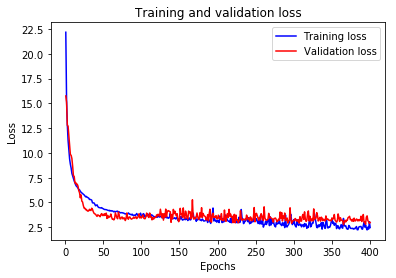

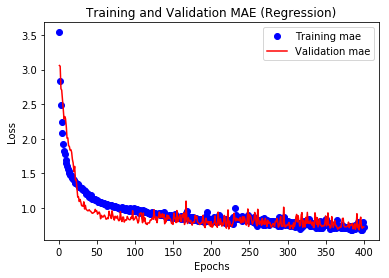


      True  Predicted      %diff
0  15.2030  15.809883   3.991864
1  12.3659  11.743237   5.035327
2   4.1035   5.208483  26.927811
3  27.0265  27.527163   1.852488
4  23.7735  24.289896   2.172150
5  10.6363  10.420986   2.024330
6  13.6209  13.551115   0.512337
7  25.4723  25.704062   0.909857
8  10.8214   9.914574   8.379935
9  36.6720  40.390919  10.141031


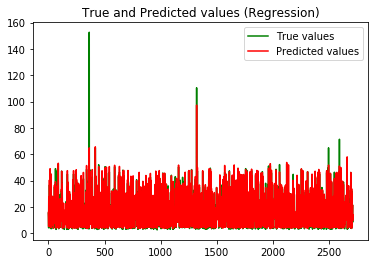

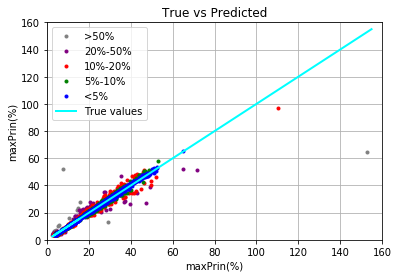


R squared score: 0.9516973269572157


<Figure size 432x288 with 0 Axes>

In [25]:
mps.train(plot_results=True, evaluate_test=True)

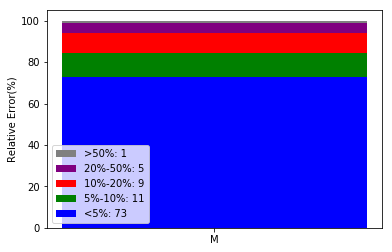

In [26]:
mps.plot_bucketPercent_stackedBarchart()

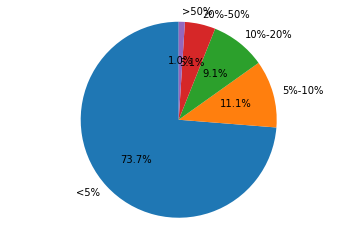

In [27]:
mps.plot_piePercentChart()

In [28]:
betwn= (0, 1000000)

In [29]:
# Testing train(just for sanity)
mps_preds= predictions(mps, mps.df, betwn)
# mps_preds= predictions(mps, mps.df, betwn, mx= mps.max_dict['maxPrin(%)'], mn= mps.min_dict['maxPrin(%)'])
# mps_preds= predictions(mps, mps.df, betwn, mx= mps.mean_dict['maxPrin(%)'], mn= mps.std_dict['maxPrin(%)'])

mps_preds.head()

# mps_test1_preds= predictions(mps, mps.df, betwn, mx= mps.mean_dict['maxPrin(%)'], mn= mps.std_dict['maxPrin(%)'])

# # Predictions to csv
# preds= predictions(mps, mps.df.copy(), betwn)
# preds.columns= ['True', 'Predicted', '%diff']
# preds['elemId']= mps.df.copy().reset_index()['elemId']
# preds['elConnect']= mps.df.copy().reset_index()['elConnect']
# preds.sort_values(['elemId'], inplace= True)
# preds.set_index(['elemId'], inplace= True)
# preds.to_csv("C:/Users/mlgpkhad/Desktop/Data/newData/train_preds.csv")

(18089, 3)


,actuals,preds,%diff
0,25.6908,23.273045,9.410978
1,29.1986,31.414730,7.589850
2,13.6565,18.825548,37.850461
3,18.2921,19.241470,5.190057
4,12.7352,17.728273,39.206871


<h6>Testing test set 1</h6>

In [30]:
mpsdf1_final_testing.shape

(25850, 21)

In [31]:
# # Predictions to csv
# preds= predictions(mps, mpsdf1_final_testing.copy(), betwn)
# preds.columns= ['True', 'Predicted', '%diff']
# preds['elemId']= mpsdf1_final_testing.copy().reset_index()['elemId']
# preds['elConnect']= mpsdf1_final_testing.copy().reset_index()['elConnect']
# preds.to_csv("C:/Users/mlgpkhad/Desktop/Data/newData/test1_preds_7b.csv")

Shape: (25850, 21)
(25850, 3)
Res: (25850, 3)
       actuals     preds      %diff
25845   2.9535  3.864374  30.840492
25846   2.9801  3.864374  29.672626
25847   2.9908  3.864374  29.208704
25848   3.0584  3.864374  26.352796
25849   3.0191  3.864374  27.997546


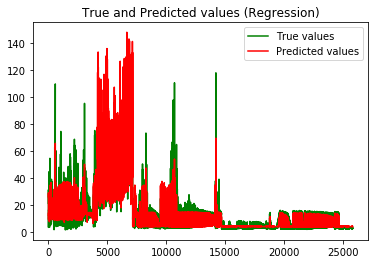

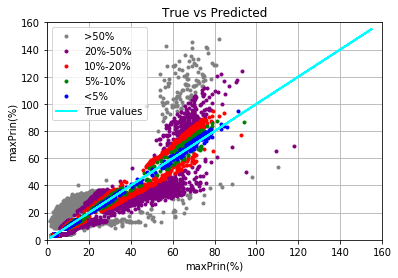


R squared score: 0.8546715456053311


<Figure size 432x288 with 0 Axes>

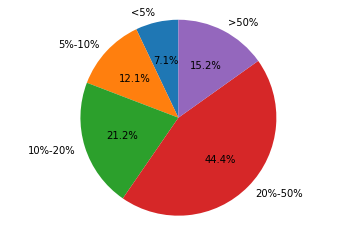

(44.80797318591005, 3.6102280313720847)

In [32]:
# Testing test set 1
# mul= 1
mps_test1= ANN(df= mpsdf1_final_testing.copy())
mps_test1.labels= ['maxPrin(%)']

# mps_test1.scale_df(mul= mul)
# mps_test1.scale_df(mul= mul)
# mps_test1.normalize_df()
print("Shape:", mps_test1.df.shape)
mps_test1_preds= predictions(mps, mpsdf1_final_testing.copy(), betwn)
# mps_test1_preds= predictions(mps, mps_test1.df, betwn, mx= mpsdf1_final_testing['maxPrin(%)'].max(), mn= mpsdf1_final_testing['maxPrin(%)'].min())
# mps_test1_preds= predictions(mps, mps_test1.df, betwn, mx= mps_test1.mean_dict['maxPrin(%)'], mn= mps_test1.std_dict['maxPrin(%)'])
print("Res:",mps_test1_preds.shape)
print(mps_test1_preds.tail())

# Stacked Barchart
mps_test1_preds.columns= ['True', 'Predicted', '%diff']
mps_test1.true_predicted_df= mps_test1_preds.copy()
mps_test1.true_values= mps_test1_preds['True'].copy().values.ravel()
mps_test1.predicted_values= mps_test1_preds['Predicted'].copy().values.ravel()

mps_test1.eval_test_regression(plot_eval=True)

# mps_test1.plot_bucketPercent_stackedBarchart()
mps_test1.plot_piePercentChart()

give_mse_mae(mps_test1_preds)

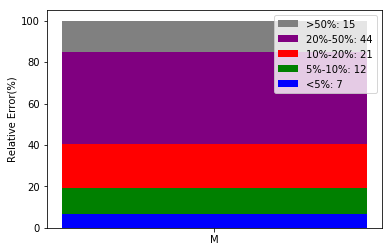

In [33]:
mps_test1.plot_bucketPercent_stackedBarchart()

In [34]:
mpsdf1_final_testing.copy().shape

(25850, 21)

In [35]:
mps_test1_preds.shape

(25850, 3)

<h6>Testing test set 2</h6>

In [36]:
# # Predictions to csv
# preds= predictions(mps, mpsdf2_final_testing.copy(), betwn)
# preds.columns= ['True', 'Predicted', '%diff']
# preds['elemId']= mpsdf2_final_testing.copy().reset_index()['elemId']
# preds['elConnect']= mpsdf2_final_testing.copy().reset_index()['elConnect']
# preds.to_csv("C:/Users/mlgpkhad/Desktop/Data/newData/test2_preds_7a.csv")

In [37]:
mpsdf2_final_testing.shape

(18097, 21)

(18097, 3)
       actuals     preds      %diff
18092   5.8349  3.864374  33.771377
18093   6.1126  3.864374  36.780193
18094   6.4096  4.443624  30.672359
18095   9.3368  7.474493  19.945881
18096   9.6066  7.834847  18.443076


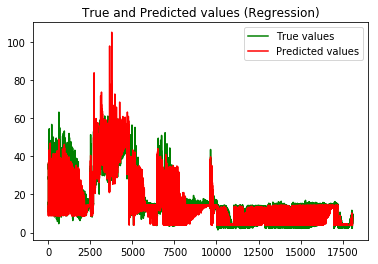

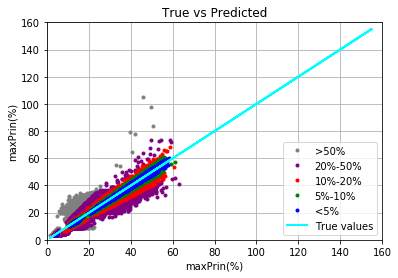


R squared score: 0.9095980849765584


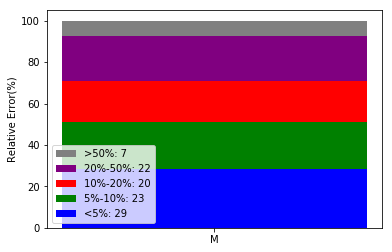

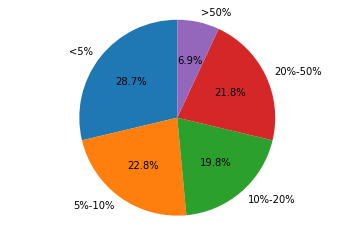

(15.661675002869135, 2.307516391411129)

In [38]:
# Testing test set 2
mps_test2= ANN(df= mpsdf2_final_testing.copy())
mps_test2.labels= ['maxPrin(%)']

# mps_test2.normalize_df()
# mps_test2.scale_df(mul= mul)

mps_test2_preds= predictions(mps, mpsdf2_final_testing.copy(), betwn)
# mps_test2_preds= predictions(mps, mps_test2.df, betwn, mx= mps_test2.mean_dict['maxPrin(%)'], mn= mps_test2.std_dict['maxPrin(%)'])
# mps_test2_preds= predictions(mps, mps_test2.df, betwn, mx= mps_test2.max_dict['maxPrin(%)'], mn= mps_test2.min_dict['maxPrin(%)'])
print(mps_test2_preds.tail())

# Stacked Barchart
mps_test2_preds.columns= ['True', 'Predicted', '%diff']
mps_test2.true_predicted_df= mps_test2_preds
mps_test2.true_values= mps_test2_preds['True'].values.ravel()
mps_test2.predicted_values= mps_test2_preds['Predicted'].values.ravel()

mps_test2.eval_test_regression(plot_eval=True)

mps_test2.plot_bucketPercent_stackedBarchart()
mps_test2.plot_piePercentChart()

give_mse_mae(mps_test2_preds)

<h3>sThin(%)</h3>

In [39]:
# Creating a copy of df
stdf= df.copy()
stdf1_final_testing= df1_final_testing.copy()
stdf2_final_testing= df2_final_testing.copy()

In [40]:
# Dropping maxPrin(%)
st.drop(['maxPrin(%)'], axis= 1, inplace= True)
st1_final_testing.drop(['maxPrin(%)'], axis= 1, inplace= True)
st2_final_testing.drop(['maxPrin(%)'], axis= 1, inplace= True)

NameError: name 'st' is not defined

<h6>Training</h6>

In [ ]:
# ANN object creation
st= ANN(df= stdf.copy())
st.labels= ['sThin(%)']

In [ ]:
st.parameters()

In [ ]:
# Setting all parameters
st.validation_size= 0.15
st.test_size= 0.15
st.n_layers= 4
st.n_nodes_per_layer= [24, 32, 12, 1]
st.actvn_per_layer= ['relu', 'relu', 'relu', 'linear']
st.lr_rate= 0.01
st.optimizer= 'Adam'
st.loss= 'mse'
st.metrics= ['mae']
st.epochs= 100
st.batch_size= 10

st.dropout= None
st.l1= None
# mps.l2= [None, 0.01, 0.01, 0.01]
st.l2= None

In [ ]:
st.df.describe()